### p73 선형 회귀 모델
 - 데이터를 선형 함수로 모델링
 - 최소제곱법 : 평균 제곱오차를 최소화하는 파라미터를 찾는다.
   - 파라미터를 줄이고 키우고를 반복한다(예시)
   - 오차를 파라미터로 미분한 값만큼 조절을 반복한다(경사하강법)
   - 정규방정식으로 찾기(데이터가 많아지면 메모리 부족으로 사용 불가)
 - 평균제곱오차 : 오차(예측과 정답의 차이)를 제곱 > 모든 샘플들의 오차를 평균

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# 키와 몸무게, 몸무게로부터 키를 예측해보자
몸무게 = [30,60,70,90]
키 = [120,160,170,190]
몸무게_test = [65,80] # 이 두사람의 키는 어떻게 될까?

In [20]:
몸무게 = np.array(몸무게).reshape(-1,1) #  행이 객체이므로 4행 1열로
키 = np.array(키)
몸무게_test = np.array(몸무게_test).reshape(-1,1)

In [21]:
#76 모델 선택
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=몸무게, y=키) # Y = w*x+b 에서 w와 b를 조절하는 것

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
몸무게_test, lr.predict(몸무게_test)

(array([[65],
        [80]]), array([162.93333333, 180.53333333]))

In [36]:
lr.score(몸무게,키) # 결정계수 max 1

0.9928205128205129

In [37]:
#계수 w와 절편 b, Y = wx + b =1.17 * x + 86.6
lr.coef_, lr.intercept_

(array([1.17333333]), 86.66666666666667)

In [41]:
lr.coef_ * 몸무게 + lr.intercept_ # Y = w * x + b

array([[121.86666667],
       [157.06666667],
       [168.8       ],
       [192.26666667]])

array([120, 160, 170, 190])

In [40]:
키

array([120, 160, 170, 190])

## LinearRegression 으로 내일의 종가 예측
 - 입력(X: 하루 전 데이터), 출력(Y; 다음 날의 종가)
 - 데이터 총 m = =10, 학습용 8, 테스트 2
 - 정규화는 일단 생략

In [455]:
#url='http://finance.daum.net/domestic/kospi200'
url='코스피200_다음 금융.html'
tables = pd.read_html(url,index_col=0)
len(tables)

3

In [80]:
type(tables[1])
df = tables[1]
df.head()

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,276.57,▼0.70,-0.25%,22042,803157,336,62,-378
19.07.01,277.27,▼0.23,-0.08%,74357,3446049,-214,1286,365
19.06.28,277.50,▼0.25,-0.09%,67598,2879563,-1802,3011,-1189
19.06.27,277.75,▲2.22,+0.81%,66303,3357666,-4165,1837,2415
19.06.26,275.53,▲0.25,+0.09%,58818,2636531,-712,157,557


In [81]:
df['전일비'] = df['전일비'].replace('▼','',regex=True)
df['전일비'] = df['전일비'].replace('▲','',regex=True)
df['등락률'] = df['등락률'].replace('%','',regex=True)
#df = df.replace('%','',regex=True)
#df = df.replace('+','',regex=True)

In [82]:
df['전일비'] = df['전일비'].astype(np.float)
df['등락률'] = df['등락률'].astype(np.float)

In [83]:
# X와 y를 분리
X = df.iloc[1:] # 오늘 데이터 제외
y = df.iloc[:-1,0] # 가장 오래된 데이터와 종가 외의 컬럼 제외
X.shape, y.shape

((9, 8), (9,))

In [96]:
# Train / Test 용 분리
from sklearn.model_selection import train_test_split
offset =2
X_train = X[offset:] # 예전
X_test = X[:offset]  # 최근
y_train = y[offset:] # 예전
y_test = y[:offset]  # 최근
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [87]:
# train 으로 Linear Regression 모델 fit
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [89]:
# score 측정
lr.score(X_train, y_train), lr.score(X_test, y_test)
# 예측을 그래프로 시각화

(1.0, -250.22653279004837)

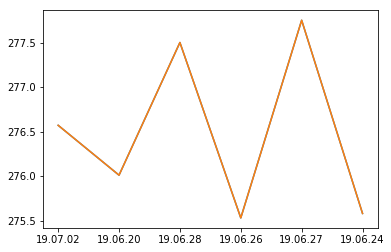

In [90]:
plt.plot(lr.predict(X_train))
plt.plot(y_train)

In [239]:
url='http://finance.daum.net/domestic/kospi200'
url='코스피200_다음 금융.html'
tables = pd.read_html(url,index_col=0)
len(tables)

3

In [240]:
type(tables[1])
df = tables[1]
df.head()

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,276.57,▼0.70,-0.25%,22042,803157,336,62,-378
19.07.01,277.27,▼0.23,-0.08%,74357,3446049,-214,1286,365
19.06.28,277.50,▼0.25,-0.09%,67598,2879563,-1802,3011,-1189
19.06.27,277.75,▲2.22,+0.81%,66303,3357666,-4165,1837,2415
19.06.26,275.53,▲0.25,+0.09%,58818,2636531,-712,157,557


In [241]:
df['전일비'] = df['전일비'].replace('▼','-',regex=True)
df['전일비'] = df['전일비'].replace('▲','',regex=True)
df['등락률'] = df['등락률'].replace('%','',regex=True)
#df = df.replace('%','',regex=True)
#df = df.replace('+','',regex=True)

In [242]:
df['전일비'] = df['전일비'].astype(np.float)
df['등락률'] = df['등락률'].astype(np.float)

In [243]:
minimum = np.min(df, axis=0)
maximum = np.max(df, axis=0)
df_norm = (df - minimum) / (maximum - minimum)

In [250]:
# X와 y를 분리
X = df_norm .iloc[1:] # 오늘 데이터 제외
y = df_norm .iloc[:-1,0] # 가장 오래된 데이터와 종가 외의 컬럼 제외
X.shape, y.shape

((9, 8), (9,))

In [251]:
# Train / Test 용 분리
from sklearn.model_selection import train_test_split
offset =2
X_train = X[offset:] # 예전
X_test = X[:offset]  # 최근
y_train = y[offset:] # 예전
y_test = y[:offset]  # 최근


In [269]:
'''
train 으로 Linear Regression 모델 fit
 78 릿지(ridge) 모델 : w를 가능한 작게 만드는 LinearRegression
  규제(regularization) - Lasso : L1(abs), Ridge: L2(square)
  라쏘 : 몇가지 특징만 사용해서 Y를 예측하고 싶을 때
 W를 줄인다는 것은 Y를 예측하는 데 가능한 모든 특성을 반영해라
 Y = w1 * x1 + w2 * x2 + ........wi * xi + b
'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = Lasso(alpha=1.0).fit(X_train, y_train)

In [270]:
# score 측정, LR -2만점, Ridge -14점
#Linear regression : train 굿, 테스트 bad :과적합 Overfitting

lr.score(X_train, y_train), lr.score(X_test, y_test)
# 예측을 그래프로 시각화

(0.0, -4.697392753019678)

In [271]:
np.sum(lr.coef_)

0.0

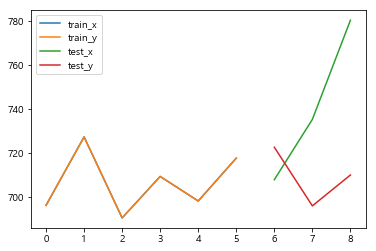

In [487]:
#예측을 그래프로 시각화
train_len = np.arange(len(X_train))
test_len = np.arange(len(X_train), len(X_train) + len(X_test))
plt.plot(train_len, lr.predict(X_train), label='train_x')
plt.plot(train_len, y_train, label='train_y')
plt.plot(test_len, lr.predict(X_test), label='test_x')
plt.plot(test_len, y_test, label='test_y')
plt.legend()


In [488]:
#f = '_기간별평균환율조회(기간별)_20190702.xls'
f = '기간별평균환율조회(기간별)_20190702.csv'
#pd.read_excel(f)
df = pd.read_csv(f,encoding ='euc-kr', index_col=0,header=1)
df.shape

(248, 8)

In [489]:
df4 = df.iloc[:,:4]
df4 = df4.dropna() #NaN 하나라도 있으면 그 행을 버린다

전처리(문자 > 숫자) preprocessing

In [490]:
df4 = df4.replace(',','',regex=True)
df = df4.astype(np.float)

In [491]:
df4.tail()

,보내실때,받으실때,사실때,파실때
2018.07.05,1021.83,1002.21,1029.73,994.31
2018.07.04,1019.92,1000.34,1027.80,992.46
2018.07.03,1014.98,995.48,1022.82,987.64
2018.07.02,1020.55,1000.95,1028.43,993.07
2018.06.29,1015.36,995.86,1023.20,988.02


In [494]:
plt.rc('font', family='Malgun Gothic')
df4.iloc[::-1].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [493]:
f = '8.8.1.1 주요국통화의 대원화 환.xls'
df= pd.read_excel(f, index_col=0,header=3)
df.shape

(369, 2)

In [319]:
df.columns = ['미국달러', '일본엔']

In [325]:
df2 = df.dropna()

In [333]:
windows_week = 4
windows_day = windows_week * 5 # 5일
predict_day = 5
windows_day

20

In [324]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2018/06/29 to 2019/07/02
Data columns (total 2 columns):
미국달러    248 non-null float64
일본엔     248 non-null float64
dtypes: float64(2)
memory usage: 5.8+ KB


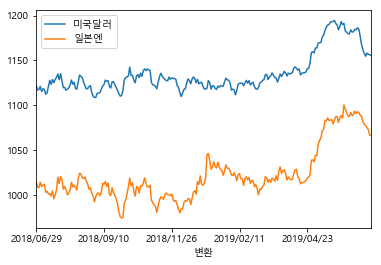

In [321]:
df2.plot()

X, Y 갯수 체크
 - 데이터가 30개 있으면? 20개로부터 5일 예측하므로 (20+5) = 1샘플, 총5샘플
 - 현재 데이터 248개 샘플,총 224쌍의 X, Y 를 만들어야 합니다.
 - X[224, 2 * 20], y[224, 2 * 5]

In [338]:
len(df2), windows_day + predict_day, len(df2) - (windows_day + predict_day) + 1

(248, 25, 224)

In [343]:
offset =  windows_day + predict_day - 1
offset, len(df2) - offset

(24, 224)

In [353]:
before = df2.iloc[:-predict_day] #최근 데이터 24개 뺴고
later = df2.iloc[windows_day:] #최근 데이터 24개 뺴고
before.shape, later.shape

((243, 2), (228, 2))

In [354]:
m = len(df2) - (predict_day + windows_day -1)
m

224

In [376]:
x_list = []
y_list = []
for i in range(m) :
    x = df2.iloc[i:i+windows_day] # 20일간의 데이터
    y = df2.iloc[i+windows_day:i+windows_day+predict_day] # 5일간의 데이터
    x_list.append(x.values) #날짜 인덱스 빼고 값만 저장
    y_list.append(y.values)

In [377]:
len(x_list)

224

In [497]:
X = np.array(x_list)
y= np.array(y_list)
X.shape, y.shape #(m-instance, day, 특징수(달러,엔화))

((224, 20, 2), (224, 5, 2))

In [498]:
X = np.reshape(X,[m, -1])
y = np.reshape(y,[m, -1])
X.shape, y.shape # (달러, 엔화, 닫러, 엔화.....)

((224, 40), (224, 10))

In [499]:
# train /test 분리
offset = 30
X_train = X[offset:]
X_test = X[:offset]
y_train = y[offset:]
y_test = y[:offset]
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((194, 40), (30, 40), (194, 10), (30, 10))

In [500]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = Ridge(alpha=1.0).fit(X_train, y_train)

In [501]:
# score 측정, LR -2만점, Ridge -14점
#Linear regression : train 굿, 테스트 bad :과적합 Overfitting

lr.score(X_train, y_train), lr.score(X_test, y_test)
# 예측을 그래프로 시각화

(0.9205409191491469, -0.6542108232125314)

In [507]:
#미래의 5일 환율 예측을 그래프로 시각화
최근20일데이터 = df2.iloc[-windows_day:].values.reshape([1,-1])
미래의5일예측 = lr.predict(최근20일데이터)
미래의5일예측 = np.reshape(미래의5일예측, [predict_day, 2]) #다시 3차원으로 변환
미래의5일예측.shape


(5, 2)

In [503]:
X.shape

(224, 40)

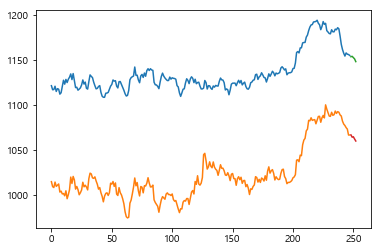

In [504]:
usa = df2.iloc[:,0].values
jpn = df2.iloc[:,1].values
x_num = np.arange(len(usa))
x1_num = np.arange(len(usa),len(usa)+len(미래의5일예측))
plt.plot(x_num,usa)
plt.plot(x_num,jpn)
plt.plot(x1_num,미래의5일예측[:,0])
plt.plot(x1_num,미래의5일예측[:,1])

In [460]:
#url='http://finance.daum.net/domestic/kosdaq'
url='Kosdaq.html'
pd.read_html(url)
#url='코스피200_다음 금융.html'
tables = pd.read_html(url,index_col=0)

In [461]:
type(tables[1])
df = tables[1]
df.head()

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,696.25,▲0.25,+0.04%,685752,3998609,729,-180,-571
19.07.01,696.00,▲5.47,+0.79%,734433,5156354,75,719,-795
19.06.28,690.53,▼7.68,-1.10%,784769,4241075,170,-121,-74
19.06.27,698.21,▼11.16,-1.57%,909979,5131838,663,-851,380
19.06.26,709.37,▼0.65,-0.09%,981440,4747047,-204,112,311


In [462]:
df['전일비'] = df['전일비'].replace('▼','-',regex=True)
df['전일비'] = df['전일비'].replace('▲','',regex=True)
df['등락률'] = df['등락률'].replace('%','',regex=True)
#df = df.replace('%','',regex=True)
#df = df.replace('+','',regex=True)

In [463]:
df['전일비'] = df['전일비'].astype(np.float)
df['등락률'] = df['등락률'].astype(np.float)

In [464]:
# X와 y를 분리
X = df.iloc[1:] # 오늘 데이터 제외
y = df.iloc[:-1,0] # 가장 오래된 데이터와 종가 외의 컬럼 제외
X.shape, y.shape

((9, 8), (9,))

In [466]:
# Train / Test 용 분리
from sklearn.model_selection import train_test_split
offset =2
X_train = X[offset:] # 예전
X_test = X[:offset]  # 최근
y_train = y[offset:] # 예전
y_test = y[:offset]  # 최근
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [468]:
# train 으로 Linear Regression 모델 fit
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [469]:
# score 측정
lr.score(X_train, y_train), lr.score(X_test, y_test)
# 예측을 그래프로 시각화

(1.0, -17.87550057486128)

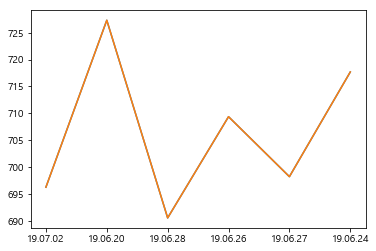

In [470]:
plt.plot(lr.predict(X_train))
plt.plot(y_train)